<a href="https://colab.research.google.com/github/kavana-senorita/Urban-Sound-Classification/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear classification**


Linear classification is the process of classifying the data into different classes .






















**Problem Statement**

To develop a Machine Learning model that accurately classifies environmental sound into predefined categories, such as 'car horns','street music','dog barking' etc. we can easily classify frequency of sounds based on their classID's using the UrbanSound8k dataset.


The main objective is to identify the correct sound class for a given audio clip based on  its acoustic features, improving applications like noise pollution monitoring, smart city planning and audio recognition Systems.

**URBAN SOUND 8K CLASSIFICATION**

This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air_conditioner, car_horn, children_playing, dog_bark, drilling, enginge_idling, gun_shot, jackhammer, siren, and street_music.

This contains the information:

**slice_file_name**: The name of the audio file. The name takes the following format:

**[fsID]**:the Freesound ID of the recording from which this excerpt (slice) is taken.

**[classID]:**a numeric identifier of the sound class (see description of classID below for further details).

**[occurrenceID]:** a numeric identifier to distinguish different occurrences of the sound within the original recording.

**[sliceID]:** a numeric identifier to distinguish different slices taken from the same occurrence.

**start**: The start time of the slice in the original Freesound recording

**end**: The end time of slice in the original Freesound recording

**salience**: A (subjective) salience rating of the sound. 1 = foreground, 2 = background.

**fold**: The fold number (1-10) to which this file has been allocated.



**Exploratory data Analysis**

**Data Preprocessing**


   Data preprocessing refers to the set of techniques used to clean, transform, and prepare raw data for analysis or modeling. We need to clean the data , Handling the missing values and also removing the irrelevant attributes.It is a crucial step in the data science process to ensure that the data is in a suitable format for analysis or machine learning models.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
data = pd.read_csv("/content/UrbanSound8K.csv")
data

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [ ]:
data.shape

(8732, 8)

In [ ]:
data.size

69856

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [ ]:
data.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [ ]:
#To check the duplicate values
dup = data.duplicated().value_counts()
dup

,count
False,8732


In [ ]:
#For each Column To check  null values
data.isna().sum()/len(data) * 100

,0
slice_file_name,0.0
fsID,0.0
start,0.0
end,0.0
salience,0.0
fold,0.0
classID,0.0
class,0.0


In [ ]:
data['salience'].unique()

array([1, 2])

In [ ]:
data['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [ ]:
Class=data['class'].value_counts()
Class

,count
class,
dog_bark,1000
children_playing,1000
air_conditioner,1000
street_music,1000
engine_idling,1000
jackhammer,1000
drilling,1000
siren,929
car_horn,429


In [ ]:
data['classID'].unique()

array([3, 2, 1, 0, 9, 6, 8, 5, 7, 4])

**In this we are Identifying the classID for the particular class**

In [ ]:
unique_classes= data[['classID','class']].drop_duplicates().sort_values(by='classID')
unique_classes

,classID,class
22,0,air_conditioner
9,1,car_horn
1,2,children_playing
0,3,dog_bark
196,4,drilling
122,5,engine_idling
106,6,gun_shot
171,7,jackhammer
114,8,siren
94,9,street_music


****

In [ ]:
data.drop('class',axis= 'columns',inplace = True)


In [ ]:
data.drop('slice_file_name',axis='columns',inplace=True)


In [ ]:
data

,fsID,start,end,salience,fold,classID
0,100032,0.000000,0.317551,1,5,3
1,100263,58.500000,62.500000,1,5,2
2,100263,60.500000,64.500000,1,5,2
3,100263,63.000000,67.000000,1,5,2
4,100263,68.500000,72.500000,1,5,2
...,...,...,...,...,...,...
8727,99812,159.522205,163.522205,2,7,1
8728,99812,181.142431,183.284976,2,7,1
8729,99812,242.691902,246.197885,2,7,1
8730,99812,253.209850,255.741948,2,7,1


In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data,test_size = 0.2,random_state = 42)

In [ ]:
train_inputs=train_data.iloc[:,:6]
train_targets=train_data['classID']
test_inputs=test_data.iloc[:,:6]
test_targets=test_data['classID']

In [ ]:
train_data

,fsID,start,end,salience,fold,classID
8450,93567,12.044365,16.044365,2,10,8
8585,96920,4.000000,8.000000,1,2,9
2404,156869,6.150289,10.150289,1,5,8
4477,184805,50.500000,54.500000,2,6,0
6173,34643,12.462179,16.462179,1,6,4
...,...,...,...,...,...,...
5734,23219,40.295737,44.295737,1,5,5
5191,201652,73.948515,77.948515,1,2,5
5390,204240,0.500000,4.500000,1,6,0
860,117181,4.000000,8.000000,1,8,8


In [ ]:
test_data

,fsID,start,end,salience,fold,classID
6770,54898,47.992301,51.992301,2,3,8
3534,172338,91.760480,95.760480,1,4,9
8556,95562,8.795241,12.795241,1,3,4
7870,75490,1.000000,5.000000,1,6,8
1226,128891,2.000000,6.000000,1,6,3
...,...,...,...,...,...,...
73,101729,8.500000,12.500000,2,9,0
1794,14527,10.596771,14.596771,2,9,9
3202,16692,2.209128,6.209128,1,4,5
2221,155212,156.667185,160.667185,1,6,9


<Axes: xlabel='start', ylabel='end'>

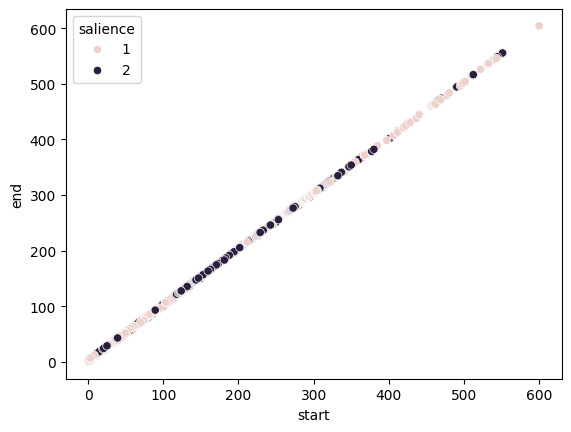

In [ ]:
sns.scatterplot(x=data.start,y=data.end,hue=data.salience)

In [ ]:
px.scatter(x=data.start,y=data.end,color=data.salience)#In plotly we use color to represents the color



**Linear Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='saga')
model.fit(train_inputs,train_targets)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [ ]:
predicted_model = model.predict(test_inputs)
predicted_model

array([2, 2, 2, ..., 2, 7, 2])

Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_targets,predicted_model)

0.1505437893531769

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_targets,predicted_model)

array([[  0,   0, 196,   0,   0,   0,   0,   7,   0,   0],
       [  0,   0,  58,   0,   0,   0,   0,  28,   0,   0],
       [  0,   0, 180,   0,   0,   0,   0,   3,   0,   0],
       [  0,   0, 176,   0,   0,   0,   0,  25,   0,   0],
       [  0,   0, 193,   0,   0,   0,   0,  13,   0,   0],
       [  0,   0, 171,   0,   0,   0,   0,  22,   0,   0],
       [  0,   0,  69,   0,   0,   0,   0,   3,   0,   0],
       [  0,   0, 125,   0,   0,   0,   0,  83,   0,   0],
       [  0,   0, 127,   0,   0,   0,   0,  38,   0,   0],
       [  0,   0, 210,   0,   0,   0,   0,  20,   0,   0]])

Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_targets,predicted_model))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.00      0.00      0.00        86
           2       0.12      0.98      0.21       183
           3       0.00      0.00      0.00       201
           4       0.00      0.00      0.00       206
           5       0.00      0.00      0.00       193
           6       0.00      0.00      0.00        72
           7       0.34      0.40      0.37       208
           8       0.00      0.00      0.00       165
           9       0.00      0.00      0.00       230

    accuracy                           0.15      1747
   macro avg       0.05      0.14      0.06      1747
weighted avg       0.05      0.15      0.07      1747



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**DecisionTree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(train_inputs,train_targets)

DecisionTreeClassifier()

In [ ]:
predictions_dt = dt_model.predict(test_inputs)
predictions_dt

array([8, 9, 4, ..., 5, 9, 8])

Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_targets,predictions_dt)

1.0

Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_targets,predictions_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00       183
           3       1.00      1.00      1.00       201
           4       1.00      1.00      1.00       206
           5       1.00      1.00      1.00       193
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00       208
           8       1.00      1.00      1.00       165
           9       1.00      1.00      1.00       230

    accuracy                           1.00      1747
   macro avg       1.00      1.00      1.00      1747
weighted avg       1.00      1.00      1.00      1747



**Random Forests Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(train_inputs,train_targets)

RandomForestClassifier()

In [ ]:
predict_rf = rf_model.predict(test_inputs)
predict_rf

array([8, 9, 4, ..., 5, 9, 8])

Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_targets,predict_rf)

1.0

**Checking New values**


By giving the new values for the existing data it will predict the sounds which belongs to the particular class that corresponds to classID's based on the frequency of the sounds.

In [ ]:
data.head(1)

,fsID,start,end,salience,fold,classID
0,100032,0.0,0.317551,1,5,3


In [ ]:
rf_model.predict([[100004,5.42350,0.10000,2,8,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([2])

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_targets,predict_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00       183
           3       1.00      1.00      1.00       201
           4       1.00      1.00      1.00       206
           5       1.00      1.00      1.00       193
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00       208
           8       1.00      1.00      1.00       165
           9       1.00      1.00      1.00       230

    accuracy                           1.00      1747
   macro avg       1.00      1.00      1.00      1747
weighted avg       1.00      1.00      1.00      1747

